In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
m = 10
n = 10
epsilon = 1e-6

In [0]:
def generate_data(m=m,n=n,pi=0.50,p=0.35,q=0.60):
    '''
    Generate data samples for given values for m, n, pi, p and q.
    -----------------------
    Arguments
    m : integer, default=10
        Number of coin tosses in an independent trial
    n : integer, default=10
        Number of independent trials trials
    pi : float, default=0.5
        Probability of selecting coin A
    p: float,  default=0.35
        Probability of a head given the coin chosen is A
    q: float,  default=0.60
        Probability of a head given the coin chosen is B
    -----------------------
    Returns
    z : numpy array of size (n,)
        z[i]=1 if coin selected for the ith trial is A and 0 if it is B.
    x : numpy array of size (n,m)
        x[i,j]=1 if the jth toss in th ith trial is heads and 0 otherwise 
    '''
    x = np.zeros((n,m))
    z_ = np.random.random(n)
    z = np.where(z_<pi,np.ones(n),np.zeros(n))
    probs = np.where(z==1,np.ones(n)*p,np.ones(n)*q) # probability of heads is p wherever z is 1
    for i in range(n):
        x_ = np.random.random(m)
        x[i] = np.where(x_<probs[i],np.ones(m),np.zeros(m))
    return [z,x]

# **Experiment 1**

In [0]:
# experiment 1
def expectation_maximization1(observed_data,epsilon=epsilon,p0=0.45,q0=0.5,pi=0.5, plot=False):
  '''
    Estimate the values of p and q of two coins when the value of pi is known
    -----------------------
    Arguments
    observed_data : numpy array
        numpy array of size (n,m)
        n = number of independent trials
        m = number of tosses in a trial
        observed_data[i,j]=1 if the jth toss in the ith trial is heads and 0 otherwise
    epsilon : float, default=1e-6
        stopping criteria for the algorithm. convergence is satisfied when the max change in 
        any paramter in succesive iterations is < epsilon
    p0 : float, default=0.45
        initialization value for the parameter p, ie, the probability of heads given coin A
    q0 : float, default=0.5
        initialization value for the parameter q, ie, the probability of heads given coin B
    pi : float,  default=0.5
        probability of selecting coin A. known parameter
    plot : boolean, default=False
        displays the learning curves if set to True
    -----------------------
    Returns
    p0 : float
        estimated value of p
    q0 : float
        estimated value of q
    '''
  n_,m_ = observed_data.shape
  p_old = p0
  q_old = q0
  p_init = p0
  q_init = q0
  p_vals = []
  q_vals = []
  errors = []
  print("\n")
  print('n: {}\tm: {}'.format(n_,m_))
  iter_ = 0
  error = 100
  while error>epsilon:
    iter_ = iter_ + 1
    h_a,t_a,h_b,t_b = 0,0,0,0
    for i in range(n_):
      n_heads = np.sum(observed_data[i])
      l_a = pi*(p0**n_heads)*((1-p0)**(m_-n_heads))
      l_b = (1-pi)*(q0**n_heads)*((1-q0)**(m_-n_heads))
      l_a,l_b = l_a/(l_a+l_b), l_b/(l_a+l_b)
      h_a += l_a*n_heads
      h_b += l_b*n_heads
      t_a += l_a*(m_-n_heads)
      t_b += l_b*(m_-n_heads)
    p0 = h_a/(h_a+t_a)
    q0 = h_b/(h_b+t_b)
    error = max(abs(p_old-p0), abs(q_old-q0))
    p_vals.append(p_old)
    q_vals.append(q_old)
    errors.append(error)
    p_old = p0
    q_old = q0

  p_vals.append(p_old)
  q_vals.append(q_old)
  errors.append(error)
  if plot:
    title = "Learning curve for m = {} n = {} p_init = {} q_init = {} pi = {}".format(m_, n_, p_init, q_init, pi)
    plt.plot(p_vals)
    plt.plot(q_vals)
    plt.plot(errors)
    plt.xlabel(r"Iterations $\rightarrow$")
    plt.ylabel(r"$\Theta$")
    plt.title(title)
    plt.grid(True)
    plt.legend(["p", "q", r"$max|\theta_{k}-\theta_{k-1}|$"],loc='lower right')
    plt.show()


  print(f"Iterations required:\t{iter_}")
  print(f"Initial Paramater Values:\tp={p_init}\tq={q_init}")
  print(f"Estimater Parameter Values:\tp_hat={p0}\tq_hat={q0}")
  print("---------------------------------------------------------------------------------------------------")

  return p0,q0

## **Experiment 1a**



n: 10	m: 1


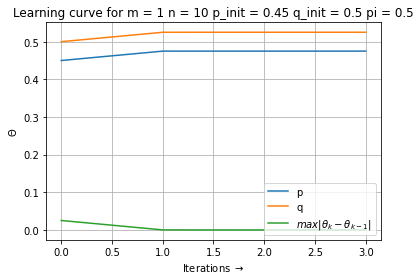

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.47493718513655125	q_hat=0.5250628140703518
---------------------------------------------------------------------------------------------------


n: 1000	m: 1


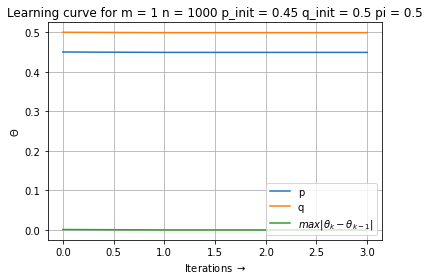

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.4490051256411582	q_hat=0.4989948743903071
---------------------------------------------------------------------------------------------------


n: 10000	m: 1


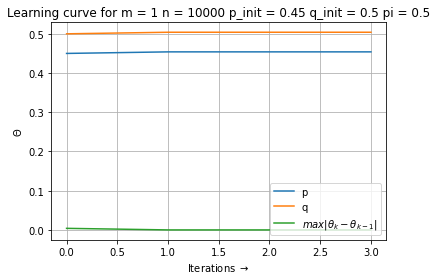

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.45398150744038474	q_hat=0.5040184924333942
---------------------------------------------------------------------------------------------------


n: 10	m: 10


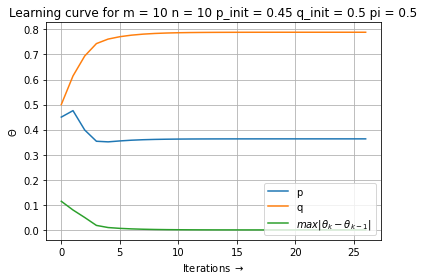

Iterations required:	26
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.36322017904107873	q_hat=0.7885088954746743
---------------------------------------------------------------------------------------------------


n: 1000	m: 10


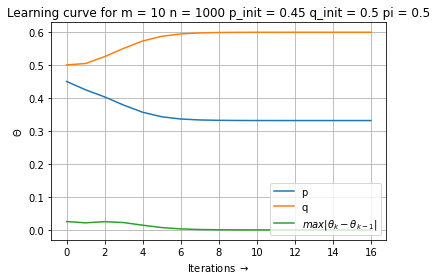

Iterations required:	16
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.33146940735469926	q_hat=0.5991581746300055
---------------------------------------------------------------------------------------------------


n: 10000	m: 10


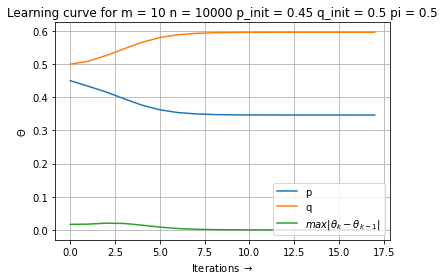

Iterations required:	17
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.34649182193320394	q_hat=0.5962111754018443
---------------------------------------------------------------------------------------------------


In [0]:
list_m = [1,10]
list_n = [10,1000,10000]
for m in list_m:
  for n in list_n:
    _,observed_data = generate_data(m=m,n=n,pi=0.5,p=0.35,q=0.6)
    p0,q0 = expectation_maximization1(observed_data,pi=0.5, plot=True)

## **Experiment 1b**



n: 10	m: 1


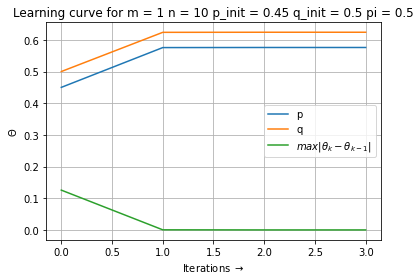

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.5759421200608833	q_hat=0.6240578764315902
---------------------------------------------------------------------------------------------------


n: 1000	m: 1


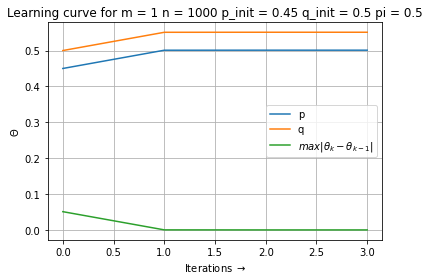

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.5010051248189011	q_hat=0.5509948735762819
---------------------------------------------------------------------------------------------------


n: 10000	m: 1


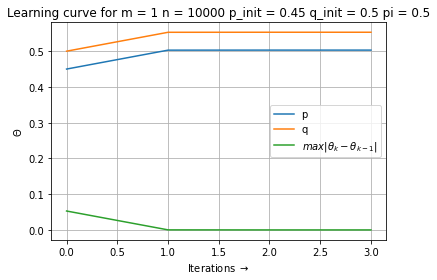

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.5030159790363248	q_hat=0.5529840192981021
---------------------------------------------------------------------------------------------------


n: 10	m: 10


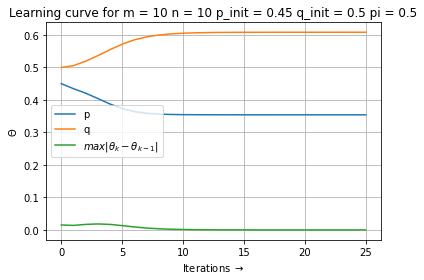

Iterations required:	25
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.35428267442385486	q_hat=0.608432746894279
---------------------------------------------------------------------------------------------------


n: 1000	m: 10


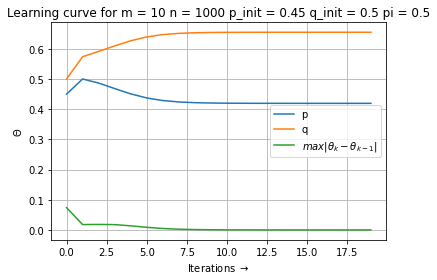

Iterations required:	19
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.4192749881675196	q_hat=0.6547494365646638
---------------------------------------------------------------------------------------------------


n: 10000	m: 10


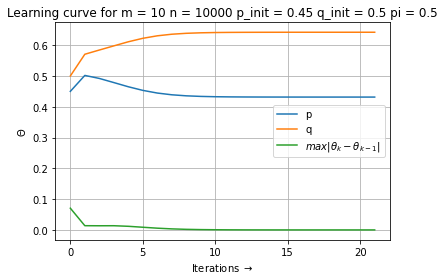

Iterations required:	21
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.431461208379602	q_hat=0.6420370462671198
---------------------------------------------------------------------------------------------------


In [0]:
list_m = [1,10]
list_n = [10,1000,10000]
for m in list_m:
  for n in list_n:
    _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
    p0,q0 = expectation_maximization1(observed_data,pi=0.5, plot=True)

## **Experiment 1c**



n: 10	m: 1


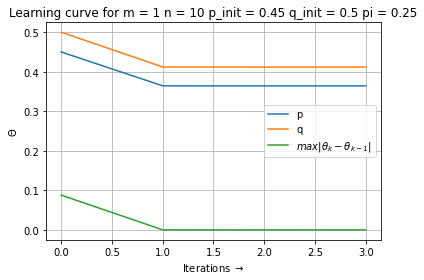

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.36429331893395006	q_hat=0.4119022276756605
---------------------------------------------------------------------------------------------------


n: 1000	m: 1


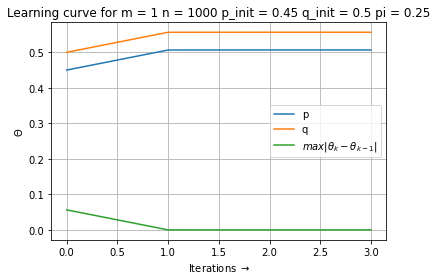

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.5065555396174334	q_hat=0.5564814862932272
---------------------------------------------------------------------------------------------------


n: 10000	m: 1


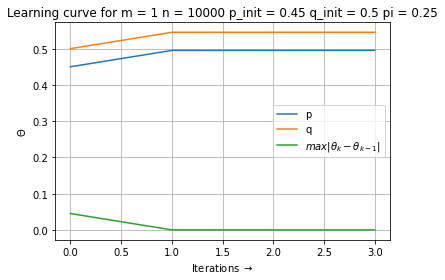

Iterations required:	3
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.4952678370402521	q_hat=0.5453107205830496
---------------------------------------------------------------------------------------------------


n: 10	m: 10


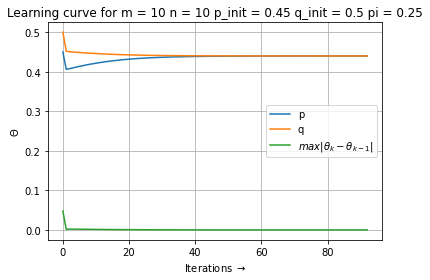

Iterations required:	92
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.43999048489816206	q_hat=0.4400031717006121
---------------------------------------------------------------------------------------------------


n: 1000	m: 10


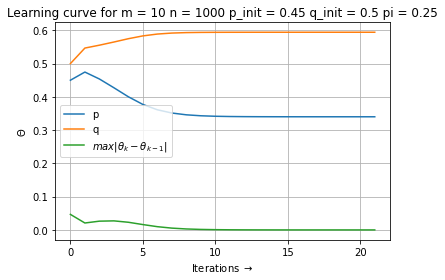

Iterations required:	21
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.34011145839543105	q_hat=0.5942289556929513
---------------------------------------------------------------------------------------------------


n: 10000	m: 10


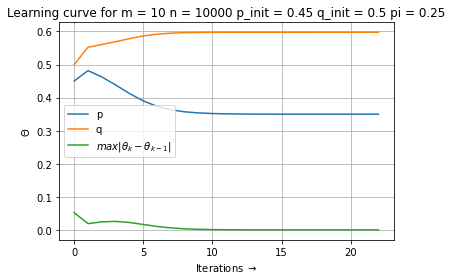

Iterations required:	22
Initial Paramater Values:	p=0.45	q=0.5
Estimater Parameter Values:	p_hat=0.34985410253323607	q_hat=0.5976098867820049
---------------------------------------------------------------------------------------------------


In [0]:
list_m = [1,10]
list_n = [10,1000,10000]
for m in list_m:
  for n in list_n:
    _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
    p0,q0 = expectation_maximization1(observed_data,pi=0.25,p0=0.45,q0=0.50, plot=True)

# **Experiment 2**

In [0]:
def expectation_maximization2(observed_data,epsilon=epsilon,p0=0.45,q0=0.5,pi=0.5, plot=False):
  '''
    Estimate the values of p, q and the probability of choosing coin A
    -----------------------
    Arguments
    observed_data : numpy array
        numpy array of size (n,m)
        n = number of independent trials
        m = number of tosses in a trial
        observed_data[i,j]=1 if the jth toss in the ith trial is heads and 0 otherwise
    epsilon : float, default=1e-6
        stopping criteria for the algorithm. convergence is satisfied when the max change in 
        any paramter in succesive iterations is < epsilon
    p0 : float, default=0.45
        initialization value for the parameter p, ie, the probability of heads given coin A
    q0 : float, default=0.5
        initialization value for the parameter q, ie, the probability of heads given coin B
    pi : float,  default=0.5
        initialization value for the parameter pi, ie, the probability of selecting coin A
    plot : boolean, default=False
        displays the learning curves if set to True
    -----------------------
    Returns
    p0 : float
        estimated value of p
    q0 : float
        estimated value of q
    pi : float
        estimated value of pi
    '''
  n_,m_ = observed_data.shape
  p_old = p0
  q_old = q0
  pi_old = pi
  p_init = p0
  q_init = q0
  pi_init = pi
  p_vals = []
  q_vals = []
  pi_vals = []
  errors = []
  print("\n")
  print('n: {}\tm: {}'.format(n_,m_))
  iter_ = 0
  error = 100
  while error>epsilon:
    iter_ = iter_ + 1
    h_a,t_a,h_b,t_b,l_pi = 0,0,0,0,0
    for i in range(n_):
      n_heads = np.sum(observed_data[i])
      l_a = pi*(p0**n_heads)*((1-p0)**(m_-n_heads))
      l_b = (1-pi)*(q0**n_heads)*((1-q0)**(m_-n_heads))
      l_a,l_b = l_a/(l_a+l_b), l_b/(l_a+l_b)
      h_a += l_a*n_heads
      h_b += l_b*n_heads
      t_a += l_a*(m_-n_heads)
      t_b += l_b*(m_-n_heads)
      l_pi += l_a
    p0 = h_a/(h_a+t_a)
    q0 = h_b/(h_b+t_b)
    pi = l_pi/n_
    error = max(abs(p_old-p0), abs(q_old-q0), abs(pi-pi_old))
    p_vals.append(p_old)
    q_vals.append(q_old)
    pi_vals.append(pi_old)
    errors.append(error)
    p_old = p0
    q_old = q0
    pi_old = pi
  
  p_vals.append(p_old)
  q_vals.append(q_old)
  pi_vals.append(pi_old)
  errors.append(error)
  if plot:
    title = "Learning curve for m = {} n = {} p_init = {} q_init = {} pi_init = {}".format(m_, n_, p_init, q_init, pi_init)
    plt.plot(p_vals)
    plt.plot(q_vals)
    plt.plot(pi_vals)
    plt.plot(errors)
    plt.xlabel("Iterations")
    plt.ylabel("Parameter Values")
    plt.title(title)
    plt.grid(True)
    plt.legend(["p", "q", "$\pi$", r"$max|\theta_{k}-\theta_{k-1}|$"])
    plt.show()


  print(f"Iterations required:\t{iter_}")
  print(f"Initial Paramater Values:\tp={p_init}\tq={q_init}\tpi={pi_init}")
  print(f"Estimater Parameter Values:\tp_hat={p0}\tq_hat={q0}\tpi_hat={pi}")
  print("---------------------------------------------------------------------------------------------------")


  return p0,q0,pi

## **Experiment 2a**



n: 10	m: 1


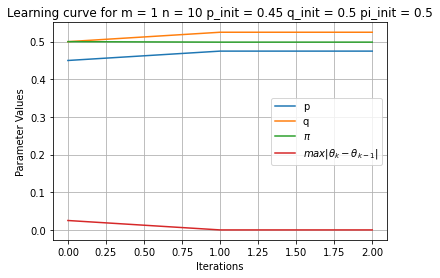

Iterations required:	2
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.4748743718592965	q_hat=0.525	pi_hat=0.4987468671679198
---------------------------------------------------------------------------------------------------


n: 1000	m: 1


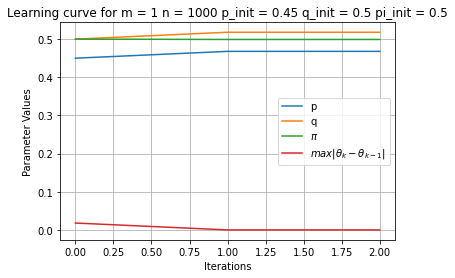

Iterations required:	2
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.4678969569147392	q_hat=0.5180126088261723	pi_hat=0.49909774436089777
---------------------------------------------------------------------------------------------------


n: 10000	m: 1


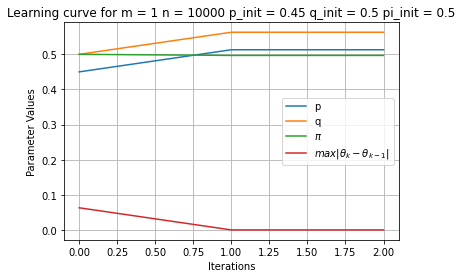

Iterations required:	2
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.5130242435859134	q_hat=0.5628605014894051	pi_hat=0.49683709273184895
---------------------------------------------------------------------------------------------------


n: 10	m: 10


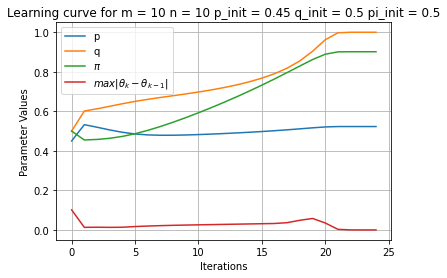

Iterations required:	24
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.5229531283305074	q_hat=1.0	pi_hat=0.9013789326301515
---------------------------------------------------------------------------------------------------


n: 1000	m: 10


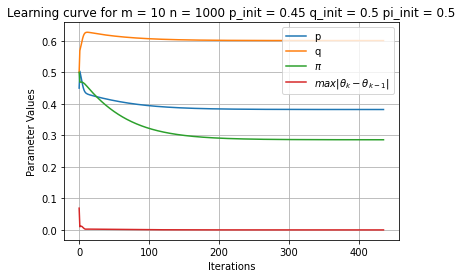

Iterations required:	435
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.3821325332820308	q_hat=0.6008955414995963	pi_hat=0.28613403156964573
---------------------------------------------------------------------------------------------------


n: 10000	m: 10


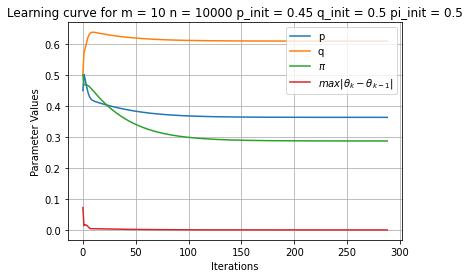

Iterations required:	288
Initial Paramater Values:	p=0.45	q=0.5	pi=0.5
Estimater Parameter Values:	p_hat=0.3635884872142523	q_hat=0.6099492531258132	pi_hat=0.28729920880023563
---------------------------------------------------------------------------------------------------


In [0]:
list_m = [1,10]
list_n = [10,1000,10000]
for m in list_m:
  for n in list_n:
    _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
    p0_,q0_,pi_ = expectation_maximization2(observed_data,pi=0.5,p0=0.45,q0=0.50, plot=True)

## **Experiment 2b**



n: 10	m: 1


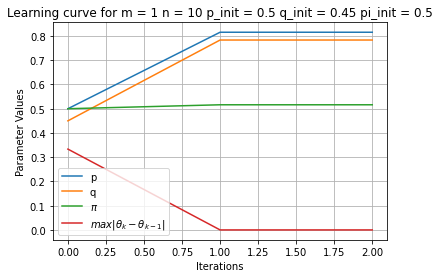

Iterations required:	2
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.8155339805825242	q_hat=0.783419689119171	pi_hat=0.5162907268170426
---------------------------------------------------------------------------------------------------


n: 1000	m: 1


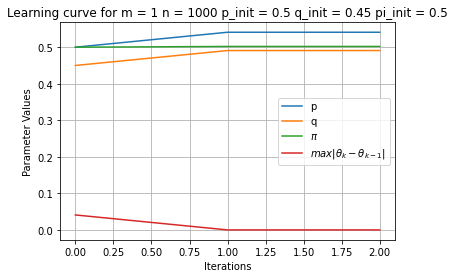

Iterations required:	2
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.5409345047923266	q_hat=0.4908596738473988	pi_hat=0.5020551378446161
---------------------------------------------------------------------------------------------------


n: 10000	m: 1


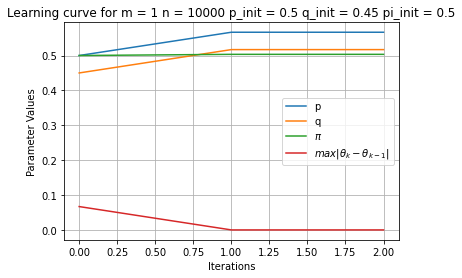

Iterations required:	2
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.5667197769369444	q_hat=0.5169459023010916	pi_hat=0.5033583959899584
---------------------------------------------------------------------------------------------------


n: 10	m: 10


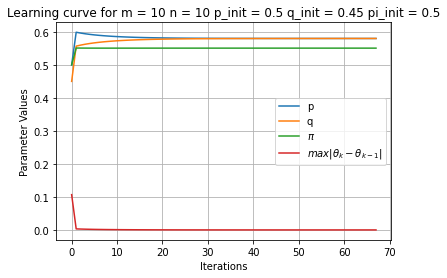

Iterations required:	67
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.5800058317148363	q_hat=0.5799928513979505	pi_hat=0.55072631218205
---------------------------------------------------------------------------------------------------


n: 1000	m: 10


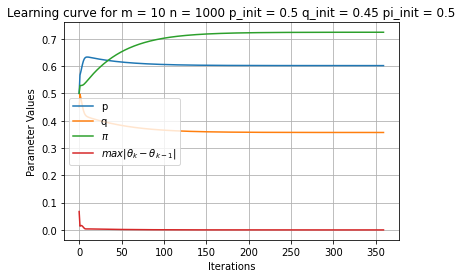

Iterations required:	359
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.6018004331302889	q_hat=0.3568710190804496	pi_hat=0.724000347640845
---------------------------------------------------------------------------------------------------


n: 10000	m: 10


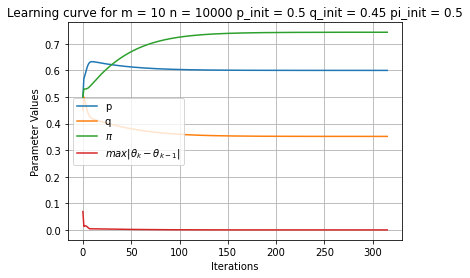

Iterations required:	315
Initial Paramater Values:	p=0.5	q=0.45	pi=0.5
Estimater Parameter Values:	p_hat=0.5999954741982084	q_hat=0.35171903900870266	pi_hat=0.7435299320711849
---------------------------------------------------------------------------------------------------


In [0]:
list_m = [1,10]
list_n = [10,1000,10000]
for m in list_m:
  for n in list_n:
    _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
    p0_,q0_,pi_ = expectation_maximization2(observed_data,pi=0.5,p0=0.5,q0=0.45, plot=True)

# **Experiment 3**

In [0]:
def expectation_maximization3(observed_data,epsilon=epsilon,p0=0.45,q0=0.5,pi=0.5,alpha=1,beta=1,plot=True):
  '''
    Estimate the values of p, q and the probability of choosing coin A
    -----------------------
    Arguments
    observed_data : numpy array
        numpy array of size (n,m)
        n = number of independent trials
        m = number of tosses in a trial
        observed_data[i,j]=1 if the jth toss in the ith trial is heads and 0 otherwise
    epsilon : float, default=1e-6
        stopping criteria for the algorithm. convergence is satisfied when the max change in 
        any paramter in succesive iterations is < epsilon
    p0 : float, default=0.45
        initialization value for the parameter p, ie, the probability of heads given coin A
    q0 : float, default=0.5
        initialization value for the parameter q, ie, the probability of heads given coin B
    pi : float,  default=0.5
        initialization value for the parameter pi, ie, the probability of selecting coin A.
        Has a prior beta distribution 
    plot : boolean, default=True
        if  true:
          returns the learning history of all parameters along with the error
        else:
          returns the estimated parameters
    alpha : integer, default=1
        alpha value in the beta prior of pi
    beta : integer, default=1
        beta value in the beta prior of pi
    -----------------------
    Returns
    if plot==False:
      p0 : float
          estimated value of p
      q0 : float
          estimated value of q
      pi : float
          estimated value of pi
    else:
      all_pis : list
          learning history of the parameter pi
      all_ps : list
          learning history of the parameter p
      all_qs : list
          learning history of the parameter q
      errors : list
          max error among the parameters in successive iterations
    '''
  n_,m_ = observed_data.shape
  p_old = p0
  q_old = q0
  pi_old = pi
  if plot:
    all_pis = []
    all_ps = []
    all_qs = []
    errors = []
    iter_ = 0
    error = 100

  while error>epsilon:
    h_a,t_a,h_b,t_b,l_pi = 0,0,0,0,0
    for i in range(n_):
      n_heads = np.sum(observed_data[i])
      l_a = pi*(p0**n_heads)*((1-p0)**(m_-n_heads))
      l_b = (1-pi)*(q0**n_heads)*((1-q0)**(m_-n_heads))
      l_a,l_b = l_a/(l_a+l_b), l_b/(l_a+l_b)
      h_a += l_a*n_heads
      h_b += l_b*n_heads
      t_a += l_a*(m_-n_heads)
      t_b += l_b*(m_-n_heads)
      l_pi += l_a

    p0 = h_a/(h_a+t_a)
    q0 = h_b/(h_b+t_b)
    pi = (l_pi+alpha-1)/(n_+alpha+beta-2)
    error = max(abs(p_old-p0), abs(q_old-q0), abs(pi-pi_old))
    if plot:
      all_pis.append(pi_old)
      all_ps.append(p_old)
      all_qs.append(q_old)
      errors.append(error)
    
    p_old = p0
    q_old = q0
    pi_old = pi

  if plot:
    all_pis.append(pi_old)
    all_ps.append(p_old)
    all_qs.append(q_old)
    errors.append(error)
    return all_ps,all_qs,all_pis, errors
  return p0,q0,pi

In [0]:
def mode_of_beta_dist(alpha, beta):
  '''
  Calculate the mode of a beta distribution for given alpha and beta
  -----------------------
  Arguments
  alpha : integer
      alpha value in a beta distribution
  beta : integer
      beta value in a beta distribution
  -----------------------
  Returns
      if alpha>1 and beta>1:
        returns mode of the distribution
      else:
        return 0.5
  '''
  if (alpha>1 and beta >1):
    return (alpha-1)/(alpha+beta-2)
  else:
    return 0.5

In [0]:
list_m = [10]
list_n = [1000,10000]
# stick to cases when we have enough data.
# For low values of m and n, the algorithm is very slow to converge
# The results are also not conclusive in the aforementioned cases as we do not have sufficient data
# and the estimates are very sensitive to the particular realization of data.

In [0]:
def run_expt3(p0=0.45, q0=0.5):
  '''
  Generate plots for different initializations of the parameter p and q for
  all possible combinations of m and n, and the given pairs of alpha and beta
  -----------------------
  Arguments
  p0 : float, default=0.45
      initialization value for the parameter p, ie, the probability of heads given coin A
  q0 : float, default=0.5
      initialization value for the parameter q, ie, the probability of heads given coin B
  -----------------------
  Returns
  None
  '''
  print("p: 0.35 \t q: 0.6 \t pi: 0.25")
  print(f"p_init: {p0} \t q_init: {q0}")
  for m in list_m:
    for n in list_n:
      print("\n")
      print('n: {}\tm: {}'.format(n,m))
      alpha = 1
      beta = 1
      _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
      # initialize pi to be the mode of the beta distribution. This is intuitive as that is the value of pi
      # we would estimate in case we had no data.
      pi_init = mode_of_beta_dist(alpha, beta)
      all_ps,all_qs,all_pis, errors = expectation_maximization3(observed_data,pi=pi_init,p0=p0,q0=q0,alpha=alpha,beta=beta)

      plt.figure(0)
      # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
      fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,sharex=False,figsize=(13,7))
      fig.tight_layout(pad=3.0)
      ax1.plot(range(len(all_pis)),all_pis,label=r'$\pi$')
      ax1.plot(range(len(all_ps)),all_ps,label=r'$p$')
      ax1.plot(range(len(all_qs)),all_qs,label=r'$q$')
      ax1.plot(range(len(errors)),errors,label=r'$max|\theta_{k}-\theta_{k-1}|$')
      ax1.set_title(r'Learning curve for $\alpha$=1,$\beta$=1')
      ax1.set_xlabel(r'Iteration $\rightarrow$',size=15)
      ax1.set_ylabel(r'$ \theta \rightarrow$',size=15)
      ax1.grid(True)
      ax1.legend()


      alpha = 1
      beta = 3
      _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
      pi_init = mode_of_beta_dist(alpha, beta)
      all_ps,all_qs,all_pis, errors = expectation_maximization3(observed_data,pi=pi_init,p0=p0,q0=q0,alpha=alpha,beta=beta)     
      
      ax2.plot(range(len(all_pis)),all_pis,label=r'$\pi$')
      ax2.plot(range(len(all_ps)),all_ps,label=r'$p$')
      ax2.plot(range(len(all_qs)),all_qs,label=r'$q$')
      ax2.plot(range(len(errors)),errors,label=r'$max|\theta_{k}-\theta_{k-1}|$')
      ax2.set_title(r'Learning curve for $\alpha$=1,$\beta$=3')
      ax2.set_xlabel(r'Iteration $\rightarrow$',size=15)
      ax2.set_ylabel(r'$ \theta \rightarrow$',size=15)
      ax2.grid(True)
      ax2.legend()

      alpha = 2
      beta = 6
      
      _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
      pi_init = mode_of_beta_dist(alpha, beta)
      all_ps,all_qs,all_pis, errors = expectation_maximization3(observed_data,pi=pi_init,p0=p0,q0=q0,alpha=alpha,beta=beta)

      ax3.plot(range(len(all_pis)),all_pis,label=r'$\pi$')
      ax3.plot(range(len(all_ps)),all_ps,label=r'$p$')
      ax3.plot(range(len(all_qs)),all_qs,label=r'$q$')
      ax3.plot(range(len(errors)),errors,label=r'$max|\theta_{k}-\theta_{k-1}|$')
      ax3.set_title(r'Learning curve for $\alpha$=2,$\beta$=6')
      ax3.set_xlabel(r'Iteration $\rightarrow$',size=15)
      ax3.set_ylabel(r'$ \theta \rightarrow$',size=15)
      ax3.grid(True)
      ax3.legend()


      alpha = 3
      beta = 9

      _,observed_data = generate_data(m=m,n=n,pi=0.25,p=0.35,q=0.6)
      pi_init = mode_of_beta_dist(alpha, beta)
          
      all_ps,all_qs,all_pis, errors = expectation_maximization3(observed_data,pi=pi_init,p0=p0,q0=q0,alpha=alpha,beta=beta)
      ax4.plot(range(len(all_pis)),all_pis,label=r'$\pi$')
      ax4.plot(range(len(all_ps)),all_ps,label=r'$p$')
      ax4.plot(range(len(all_qs)),all_qs,label=r'$q$')
      ax4.plot(range(len(errors)),errors,label=r'$max|\theta_{k}-\theta_{k-1}|$')
      ax4.set_title(r'Learning curve for $\alpha$=3,$\beta$=9')
      ax4.set_xlabel(r'Iteration $\rightarrow$',size=15)
      ax4.set_ylabel(r'$ \theta \rightarrow$',size=15)
      ax4.grid(True)
      ax4.legend()


      plt.show()
      print("---------------------------------------------------------------------------------------------------")


## **Experiment 3a**

p: 0.35 	 q: 0.6 	 pi: 0.25
p_init: 0.45 	 q_init: 0.5


n: 1000	m: 10


<Figure size 432x288 with 0 Axes>

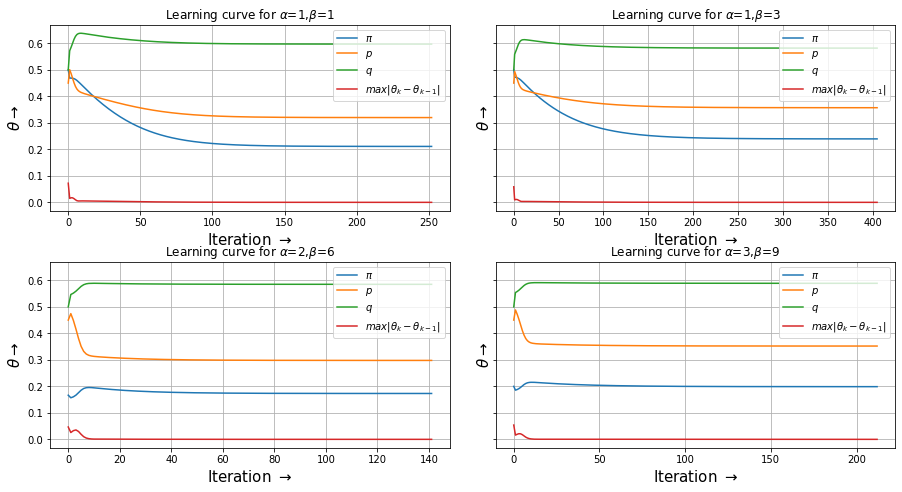

---------------------------------------------------------------------------------------------------


n: 10000	m: 10


<Figure size 432x288 with 0 Axes>

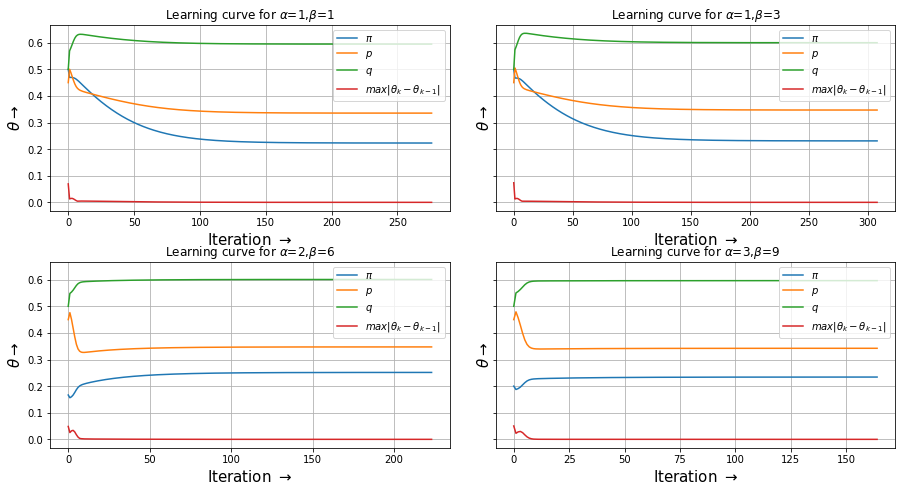

---------------------------------------------------------------------------------------------------


In [0]:
run_expt3()

## **Experiment 3b**

p: 0.35 	 q: 0.6 	 pi: 0.25
p_init: 0.5 	 q_init: 0.45


n: 1000	m: 10


<Figure size 432x288 with 0 Axes>

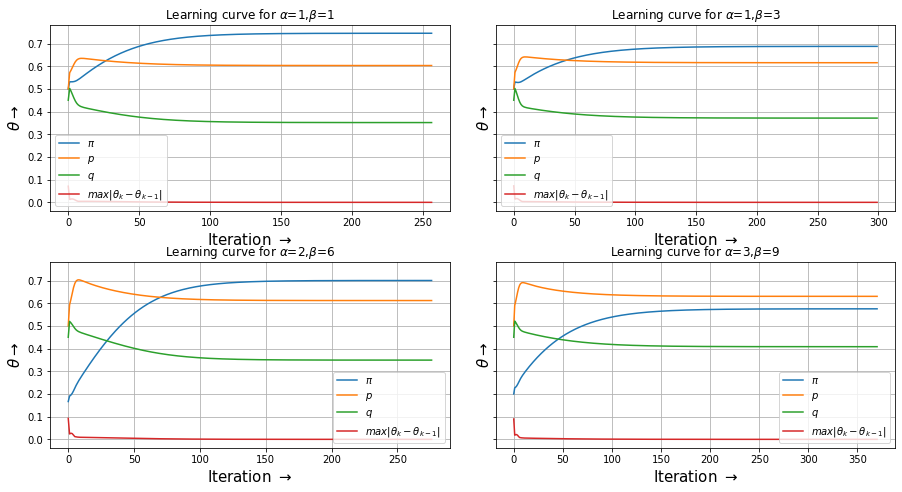

---------------------------------------------------------------------------------------------------


n: 10000	m: 10


<Figure size 432x288 with 0 Axes>

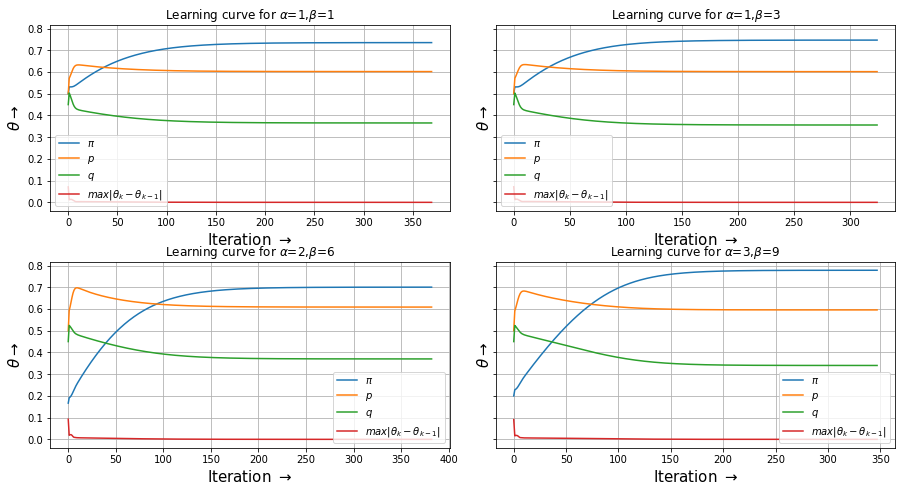

---------------------------------------------------------------------------------------------------


In [0]:
run_expt3(p0=0.5, q0=0.45)

# **Inferences**
#### **1. Observe how the final estimate of $\theta$ from the algorithm (call it $\hat{\theta}_{EM}$), and number of iterations needed for convergence, change when we increase $m$ and $n$.**

#### Ans: From the results of the experiment 1 and 2, we can say that final values (covergence to the actual values of $p$ and $q$) is much more sensitive to the number of tosses in each trial, $m$ as compared to the total number of trials, $n$. This can be explained as follows: we update the parameters after each *complete* trial. So, more the number of tosses in each trial, the more information we have about the actual parameters which in turn produces an accurate update.

#### **2.  Report your observation about case (b) and case (c) of experiment 1, where in former case we are assuming a wrong value of $\pi$ and in later case we are assuming the true value of $\pi$**
#### Ans: We observe that the when we assume the wrong value $\pi = 0.5$ instead of $\pi =0.25$, even after a large number of trials, the final values are way off from the actual values. This is because using a different value of $\pi$ in the update equations results in miscalculated updates.


#### **3. Report your observation about experiment 2 when we swap the prior for $p$ and $q$.**
#### Ans: When we swap the priors of $p$ and $q$, we observe that $\hat{p}\approx q$, $\hat{q}\approx p$ and $\hat{\pi}\approx 1-\pi$, where the $\hat{p}$, $\hat{q}$, etc are the final values and $p$, $q$, etc. are the actual values. Essentially, with regards to the observed data, there is no division to distinguish between tosses from A and tosses from B. The only hint it gets is from the initialisation. The algorithm is converging to the right value, but the *asymmetry* in the initial values is *preserved* in the final values, which makes it seem like the results are swapped.

<!-- This is probably because the EM algorithm is not guaranteed to converge to the global maxima. A bad initialization may cause it to get stuck in a local maxima. It should be noted here that the data points are coming from coins A and B, which happen to be biased towards tails and heads respectively. If the initialization is such that the initial value of $p\leq 0.5$ and the initial value of $q\geq0.5$, we can expect reasonable good convergence for enough samples of data. However, if the opposite is true for the initialization, we will likely get stuck in a local maxima which here happens to be somewhere around the identities of the coins is flipped. In real life cases it is hard to know which coin has which sort of bias so it is wise to take all four possible cases of initializations for a set of two coins and then deciding on the correct results by calculating the complete likelihood for each set of parameters estimated.  -->

#### **4. Compare the result of experiment 3 with the result of experiment 2.**
#### Ans: We restrict comparisons to the case when we have significant data, i.e., $n\ge1000$ and $m\ge10$ as in the other cases, the estimates are not stable and different realizations of the data give rise to different estimates. The following observations can be made. 
*  The convergence in $\pi$ is much faster with a beta prior than without one for the case when p and q are initialized to 0.45 and 0.5 respectively, especially for higher values of $\alpha$ and $\beta$. 
* The convergence in $\pi$ is slower with a beta prior than without one for the case when p and q are initialized to 0.5 and 0.45 respectively, especially for higher values of $\alpha$ and $\beta$.
* The convergence of p and q is also significantly faster with a prior for higher values of $\alpha$ and $\beta$ when the ordering is maintained.
* The initialization of $\pi$ to be the mode of the pdf helps especially when the initialisation in the EM algorithm is reflective of the underlying data generating distribution (ie. $p_0 > q_0$ when $p > q$). In this case the mode is a very good initialization of $\pi$. When the ordering of the coins in the EM algorithm is opposite to the one used to generate the data, (ie. $p_0 < q_0$ when $p > q$) this becomes counter productive and the convergence is much slower. 





